<a href="https://colab.research.google.com/github/sinking8/Medical-AI-Hackathon/blob/main/Medical_AI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Disease Classification

In [2]:
# Importing packages for environment setup
import zipfile
import os
from google.colab import drive

In [ ]:
# Uncomment if tensorflow is not present
# !pip install tensorflow

In [4]:
## Change runtimetype = "GPU" (runtime->runtimetype->GPU) 

# Mounting drive
drive.mount("/content/drive",force_remount=True)

# Drive directory
drive_dir = "/content/drive/MyDrive/Gryffindor/Medical AI"
# Change zipfile name here
file_name = "Ashwin combined.zip"

# Extracting zipfile
zip_ref = zipfile.ZipFile(os.path.join(drive_dir,file_name), 'r')
zip_ref.extractall("/content/data")
zip_ref.close()

Mounted at /content/drive


In [24]:
# Declaring directories
data_dir =  '/content/data/' + 'Ashwin combined'
train_dir = 'train'
test_dir  = 'test'
# val_dir   =  'val'

# Creating Directories
labels = ["NORMAL","CNV","DME","DRUSEN",""]

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import glob

In [25]:
# Creating Data Generators

# Train, Test

# Train
  # Glaucoma -> Yes/No
  # Alzheimer -> 4 categories
  # Diabetes -> CNV,NORMAL,DRUSEN,DME

# Train Data Generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

train_generator = train_datagen.flow_from_directory(
        os.path.join(data_dir,train_dir),
        target_size=(150, 150),
        batch_size=32,
        class_mode="categorical")


# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir,test_dir),
    target_size = (150,150),
    class_mode = "categorical"
)

Found 28150 images belonging to 10 classes.
Found 1651 images belonging to 10 classes.


In [12]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import  VGG16
from tensorflow import keras

In [13]:
# Loading the Model
def load_model(model_dir):
  model = keras.models.load_model(model_dir)
  return model

# Saving the Model
def save_model(model,model_dir="./data/model.h5"):
  model.save(model_dir)

# Creating the Model from the scratch
def create_model():
  # BASIC CONVOLUTION MODEL


  # Applying Transfer Learning
  
  # Adding VGG16
  

  # SINGLE INPUT MULTIPLE OUTPUT
  
  # Creating Sequential Model
  model = Sequential()
  #model.add(VGG16(include_top=False, weights=None,input_shape=(150,150,3), pooling=None, classes=10))

  # Conv2D and MaxPool2D - 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  # Conv2D and MaxPool2D - 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Conv2D - 3
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))


  # Flatten Layer
  model.add(layers.Flatten())

  # Dense Layer - Output Layer
  model.add(layers.Dense(10,activation='softmax'))

  # Compiling the model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


  return model

In [ ]:

# Change the directory of the model
model_dir = "./data/base_model.h5"

## Remember to comment the other one

# Uncomment below if you are using a trained model
# model = load_model(model_dir)

#model.save("base_model.h5")

# Uncomment below if ur training from scratch
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [ ]:
# Increase no of epochs if accuracy is below 90%
# Optimal no of epochs (10-50)
# Initial model is trained for 5 epochs

epochs = 10

# Training the model with the dataset
history = model.fit_generator(train_generator,epochs=epochs)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
880/880 [==============================] - 298s 305ms/step - loss: 0.8018 - accuracy: 0.6761
Epoch 2/10
880/880 [==============================] - 267s 303ms/step - loss: 0.5710 - accuracy: 0.7714
Epoch 3/10
880/880 [==============================] - 266s 302ms/step - loss: 0.4842 - accuracy: 0.8078
Epoch 4/10
880/880 [==============================] - 265s 301ms/step - loss: 0.4134 - accuracy: 0.8379
Epoch 5/10
880/880 [==============================] - 266s 302ms/step - loss: 0.3614 - accuracy: 0.8623
Epoch 6/10
880/880 [==============================] - 268s 304ms/step - loss: 0.3233 - accuracy: 0.8767
Epoch 7/10
880/880 [==============================] - 269s 306ms/step - loss: 0.2850 - accuracy: 0.8925
Epoch 8/10
880/880 [==============================] - 267s 303ms/step - loss: 0.2623 - accuracy: 0.9006
Epoch 9/10
880/880 [==============================] - 268s 304ms/step - loss: 0.2396 - accuracy: 0.9120
Epoch 10/10
880/880 [==============================] - 269s 306m

In [ ]:
## Save the model after training
## Add the location where the model needs to be saved (optional)
## Download the model after saving it.
save_model(model)

## Predicting

In [14]:
# Use the h5 file
model = load_model("./sample_data/model.h5")

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/content


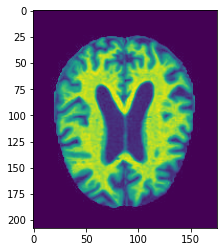

In [22]:
print(os.getcwd())
img = mpimg.imread("./sample_data/sample.jpg")
plt.imshow(img)
plt.show()

In [ ]:
test_score = model.evaluate_generator(test_generator, 1)

print("[INFO] accuracy: {:.2f}%".format(test_score[0] * 92)) 

print("[INFO] Loss: ",test_score[0])

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')



##################################################################################################

#Print the Target names

target_names = []

for key in train_generator.class_indices:

    target_names.append(key)



# print(target_names)



#Confusion Matrix 

Y_pred = model.predict_generator(test_generator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')



#Print Classification Report

print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
